In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [5]:
# Load the dataset
file_path = "agriculture.csv"
data = pd.read_csv(file_path)

In [6]:
# Preprocessing
# Drop unnecessary columns (adjust based on your dataset)
data = data.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 
                  'Item Code', 'Item', 'Year Code', 'Source Code', 'Source', 'Flag', 'Flag Description', 'Note'], axis=1)

In [7]:
# Handle missing values
data = data.dropna()

In [8]:
# Encode categorical variables if necessary
data = pd.get_dummies(data, drop_first=True)

In [9]:
# Define features (X) and target (y)
X = data.drop(['Value'], axis=1)  # Replace 'Value' with your target column if different
y = data['Value']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost Model 1

In [11]:
# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [12]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
print("Mean Absolute Error:", np.mean(np.abs(y_test - y_pred)))
print("Mean Squared Error:", np.mean((y_test - y_pred)**2))

Mean Absolute Error: 147395.81503104622
Mean Squared Error: 134364021550.3263


In [15]:
# Feature importance
import matplotlib.pyplot as plt

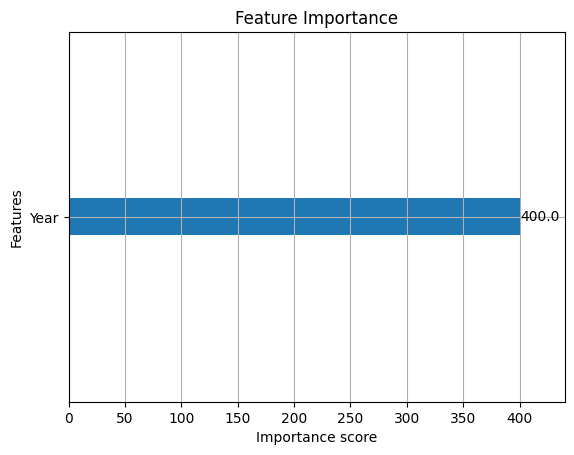

In [16]:
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()

## Light Gradient Boosting Machine

In [21]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 368, number of used features: 1
[LightGBM] [Info] Start training from score 95112.591666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

## XG Boost Model 2
*Improved feature selection and preprocessing for better accuracy*

In [22]:
# Load the dataset
file_path = "agriculture.csv"
data = pd.read_csv(file_path)

In [23]:
# Drop irrelevant columns
data = data.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Flag', 'Flag Description', 'Note'], axis=1)

In [24]:
# Remove duplicate rows by aggregating the 'Value' column
data = data.groupby(['Year', 'Item', 'Element'], as_index=False).agg({'Value': 'mean'})

In [25]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Item', 'Element'], drop_first=True)

In [26]:
# Define features (X) and target (y)
X = data.drop(['Value'], axis=1)
y = data['Value']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

In [29]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
# Make predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 14272.780485699734
Mean Squared Error: 913227912.2192509


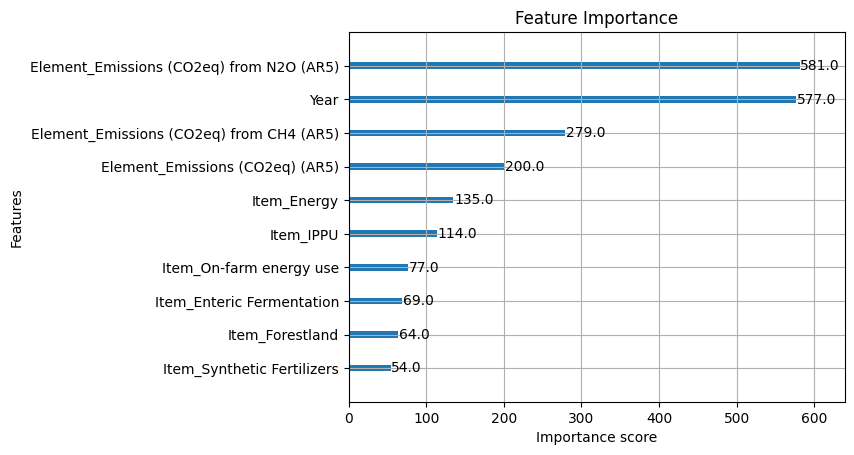

In [32]:
# Feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()